In [1]:
import multiprocessing
import numpy as np
import xarray as xr
import os
import pandas as pd
import netCDF4 as nc
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import linregress
from scipy.optimize import curve_fit
from pymer4.models import Lmer
import math
import re

In [4]:
path = 'C:/Users/111/Desktop/LMX_data_Q10/New_data/Non_forest_T/'

T = ['T']
Q10 = ['Q10']
SE = ['SE']
p = ['pvalue']
sig = ['significance']
num = ['num']
for csv_file in os.listdir(path)[0:]:
    
    Ti = int(csv_file[2:-4])
    seleceted_data = pd.read_csv(path+csv_file)
    seleceted_data['normalized_T'] = seleceted_data['normalized_T']
    m,n = seleceted_data.shape
    unique_values = np.unique(seleceted_data['num'])
    if len(unique_values) >= 3:
        model = Lmer(formula="lnR ~ normalized_T + (normalized_T||num)",
                             data=seleceted_data)
        model_result = model.fit()
        T.append(Ti)
        Q10.append(np.exp(model_result['Estimate'][1]))
        SE.append(np.exp(model_result['Estimate'][1]+model_result['SE'][1])-np.exp(model_result['Estimate'][1]))
        p.append(model_result['P-val'][1])
        sig.append(model_result['Sig'][1])
        num.append(len(unique_values))
        result = np.array([T, Q10, SE, p, sig, num])
        result_pd = pd.DataFrame(result.T)
        save_path = './Q10_result_tol5_new/10_non_forest_T_tol5.csv'
        result_pd.to_csv(save_path, index= 'a', header= False)

Linear mixed model fit by REML [’lmerMod’]
Formula: lnR~normalized_T+(normalized_T||num)

Family: gaussian	 Inference: parametric

Number of observations: 672571	 Groups: {'num': 1710.0}

Log-likelihood: -120675.973 	 AIC: 241361.946

Random effects:

                  Name    Var    Std
num        (Intercept)  1.558  1.248
num.1     normalized_T  0.091  0.302
Residual                0.081  0.285

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: lnR~normalized_T+(normalized_T||num)

Family: gaussian	 Inference: parametric

Number of observations: 752846	 Groups: {'num': 1934.0}

Log-likelihood: -110690.052 	 AIC: 221390.103

Random effects:

                  Name    Var    Std
num        (Intercept)  1.691  1.300
num.1     normalized_T  0.079  0.281
Residual                0.076  0.276

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: lnR~normalized_T+(normalized_T||

In [4]:
path = 'C:/Users/111/Desktop/LMX_data_Q10/New_data/Non_forest_AVP_T_tol_5_AVP_tol_1/'

AVP = ['AVP']
T = ['T']
Q10 = ['Q10']
SE = ['SE']
p = ['pvalue']
sig = ['significance']
num = ['num']
for csv_file in os.listdir(path)[0:]:
    pattern = r'\d+'
    matches = re.findall(pattern, csv_file)
    if len(matches) >= 2:
        AVPi = int(matches[0])
        Ti = int(matches[1])
    seleceted_data = pd.read_csv(path+csv_file)
    seleceted_data['normalized_T'] = seleceted_data['normalized_T']
    m,n = seleceted_data.shape
    unique_values = np.unique(seleceted_data['num'])
    if len(unique_values) >= 3:
        model = Lmer(formula="lnR ~ normalized_T + (normalized_T||num)",
                             data=seleceted_data)
        model_result = model.fit()
        AVP.append(AVPi)
        T.append(Ti)
        Q10.append(np.exp(model_result['Estimate'][1]))
        SE.append(np.exp(model_result['Estimate'][1]+model_result['SE'][1])-np.exp(model_result['Estimate'][1]))
        p.append(model_result['P-val'][1])
        sig.append(model_result['Sig'][1])
        num.append(len(unique_values))
        result = np.array([AVP, T, Q10, SE, p, sig, num])
        result_pd = pd.DataFrame(result.T)
        save_path = './New_result/Q10_result_tol5_new2/Q10_non_forest_AVP.csv'
        result_pd.to_csv(save_path, index= 'a', header= False)

Linear mixed model fit by REML [’lmerMod’]
Formula: lnR~normalized_T+(normalized_T||num)

Family: gaussian	 Inference: parametric

Number of observations: 53408	 Groups: {'num': 510.0}

Log-likelihood: 3305.784 	 AIC: -6601.568

Random effects:

                  Name    Var    Std
num        (Intercept)  0.811  0.900
num.1     normalized_T  0.158  0.397
Residual                0.047  0.216

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: lnR~normalized_T+(normalized_T||num)

Family: gaussian	 Inference: parametric

Number of observations: 174395	 Groups: {'num': 1522.0}

Log-likelihood: 4623.680 	 AIC: -9237.361

Random effects:

                  Name    Var    Std
num        (Intercept)  0.890  0.944
num.1     normalized_T  0.131  0.362
Residual                0.051  0.225

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: lnR~normalized_T+(normalized_T||num)

Fami

In [35]:
Q10

['Q10', 1.5824907027825335]

In [3]:
Q10_data = pd.read_csv('./Q10_non_forest_AVP.csv') #_non
m,n = Q10_data.shape

Q10_plot1 = []
T_plot1 = []
AVP_plot1 =[]

for AVPi in np.arange(5,20,1):
    Q10_ploti = []
    T_ploti = []
    for j in range(m):
        if Q10_data['AVP'][j] == AVPi and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1:
            Q10_ploti.append(Q10_data['Q10'][j])
            T_ploti.append(Q10_data['T'][j])
    if len(T_ploti)>=4:
        Q10_plot1.append(Q10_ploti)
        T_plot1.append(T_ploti)
        AVP_plot1.append(AVPi)

In [10]:
Q10_data = pd.read_csv('./Q10_non_forest_VPD.csv') #non_
m,n = Q10_data.shape

Q10_plot2 = []
T_plot2 = []
AVP_plot2 =[]

for AVPi in np.arange(5,25,1):
    Q10_ploti = []
    T_ploti = []
    for j in range(m):
        if Q10_data['AVP'][j] == AVPi and  Q10_data['pvalue'][j] ==0 and Q10_data['SE'][j] <0.1:
            Q10_ploti.append(Q10_data['Q10'][j])
            T_ploti.append(Q10_data['T'][j])
    if len(T_ploti)>=4:
        Q10_plot2.append(Q10_ploti)
        T_plot2.append(T_ploti)
        AVP_plot2.append(AVPi)

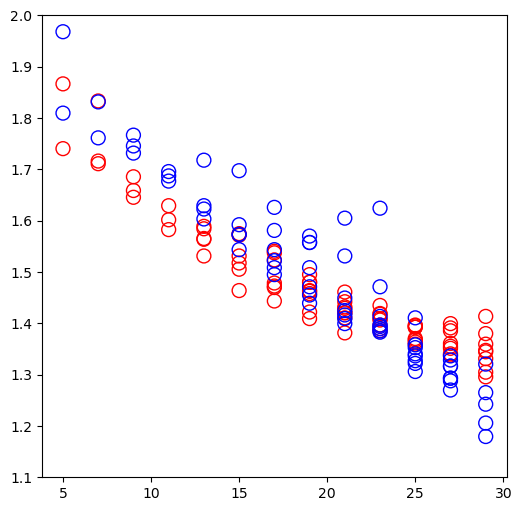

In [12]:
fig = plt.figure(figsize=(6, 6),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)


colors = ["#0000FF", "#4169E1", "#6495ED", "#00FF00", "#7CFC00", "#ADFF2F", "#FF0000", "#FF4500", "#FF6347"]
ax = fig.add_subplot(1,1,1)
for i in range(len(Q10_plot1)):
    
    ax.scatter(T_plot1[i], Q10_plot1[i], marker='o', edgecolor='red', facecolor='none', s=100)
    
    #ax.legend(fontsize=12, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
    ax.set_ylim(1.1,2)
    
for i in range(len(Q10_plot2)):
    
    ax.scatter(T_plot2[i], Q10_plot2[i], marker='o', edgecolor='blue', facecolor='none', s=100)
    
    #ax.legend(fontsize=12, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
    #ax.set_ylim(1.1,2)

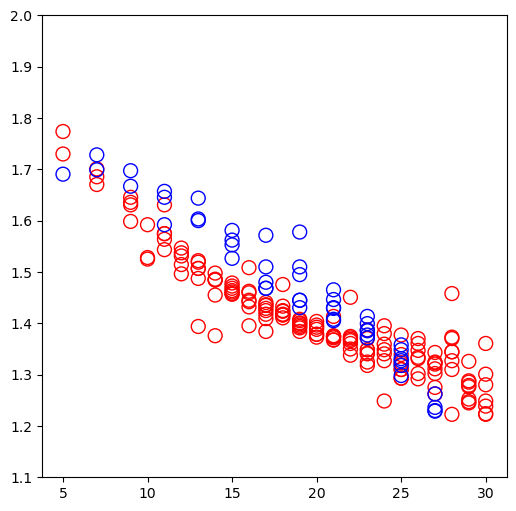

In [217]:
fig = plt.figure(figsize=(6, 6),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)


colors = ["#0000FF", "#4169E1", "#6495ED", "#00FF00", "#7CFC00", "#ADFF2F", "#FF0000", "#FF4500", "#FF6347"]
ax = fig.add_subplot(1,1,1)
for i in range(len(Q10_plot1)):
    
    ax.scatter(T_plot1[i], Q10_plot1[i], marker='o', edgecolor='red', facecolor='none', s=100)
    
    #ax.legend(fontsize=12, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
    ax.set_ylim(1.2,2)
    
for i in range(len(Q10_plot2)):
    
    ax.scatter(T_plot2[i], Q10_plot2[i], marker='o', edgecolor='blue', facecolor='none', s=100)
    
    #ax.legend(fontsize=12, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
    ax.set_ylim(1.1,2)

In [11]:
6.109*np.exp((17.625*7)/(243.04+7))

10.005992327734296

In [22]:
Q10_data = pd.read_csv('./Q10_non_forest_AVP.csv') #_non
m,n = Q10_data.shape

Q10_plot_all1 = []
T_plot_all1 = []
for j in range(m):
    if Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1:
        Q10_plot_all1.append(Q10_data['Q10'][j])
        T_plot_all1.append(Q10_data['T'][j])

Q10_mean_plot1 = []
T_mean_plot1 = []
for Ti in np.arange(5,31,2):
    Q10_i = []
    for j in range(m):
        if Q10_data['T'][j] == Ti and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1:
            Q10_i.append(Q10_data['Q10'][j])
    if len(Q10_i)>=2:
        Q10_mean_plot1.append(np.mean(Q10_i))
        T_mean_plot1.append(Ti)
        
Q10_plot1 = []
T_plot1 = []
AVP_plot1 =[]

for AVPi in np.arange(5,20,1):
    Q10_ploti = []
    T_ploti = []
    for j in range(m):
        if Q10_data['AVP'][j] == AVPi and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1:
            Q10_ploti.append(Q10_data['Q10'][j])
            T_ploti.append(Q10_data['T'][j])
    if len(T_ploti)>=4:
        Q10_plot1.append(Q10_ploti)
        T_plot1.append(T_ploti)
        AVP_plot1.append(AVPi)

In [23]:
Q10_data = pd.read_csv('./Q10_non_forest_VPD.csv') #_non
m,n = Q10_data.shape

Q10_plot_all2 = []
T_plot_all2 = []
for j in range(m):
    if Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1:
        Q10_plot_all2.append(Q10_data['Q10'][j])
        T_plot_all2.append(Q10_data['T'][j])

Q10_mean_plot2 = []
T_mean_plot2 = []
for Ti in np.arange(5,31,2):
    Q10_i = []
    for j in range(m):
        if Q10_data['T'][j] == Ti and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1:
            Q10_i.append(Q10_data['Q10'][j])
    if len(Q10_i)>=2:
        Q10_mean_plot2.append(np.mean(Q10_i))
        T_mean_plot2.append(Ti)
        
Q10_plot2 = []
T_plot2 = []
AVP_plot2 =[]

for AVPi in np.arange(5,20,1):
    Q10_ploti = []
    T_ploti = []
    for j in range(m):
        if Q10_data['AVP'][j] == AVPi and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1:
            Q10_ploti.append(Q10_data['Q10'][j])
            T_ploti.append(Q10_data['T'][j])
    if len(T_ploti)>=4:
        Q10_plot2.append(Q10_ploti)
        T_plot2.append(T_ploti)
        AVP_plot2.append(AVPi)

(1.1, 2.0)

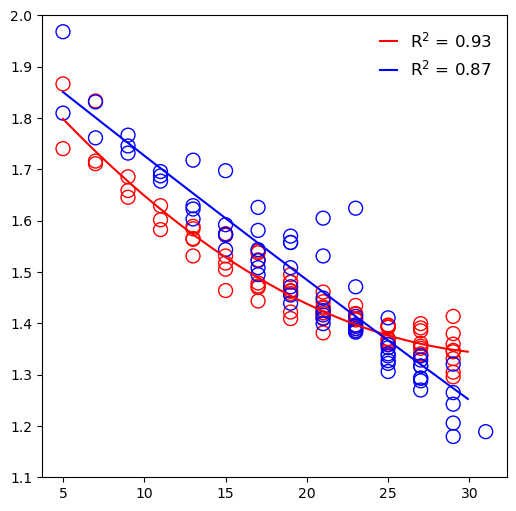

In [24]:
fig = plt.figure(figsize=(6, 6),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

colors = ["#0000FF", "#4169E1", "#6495ED", "#00FF00", "#7CFC00", "#ADFF2F", "#FF0000", "#FF4500", "#FF6347"]
ax = fig.add_subplot(1,1,1)

for i in range(len(Q10_plot1)):
    ax.scatter(T_plot1[i], Q10_plot1[i], marker='o', edgecolor='red', facecolor='none', s=100)

#ax.scatter(T_plot, Q10_plot, marker='o', edgecolor='red', facecolor='none', s=100)
#ax.scatter(T_mean_plot, Q10_mean_plot, marker='o', edgecolor='black', facecolor='none', s=100)

x = T_plot_all1
y = Q10_plot_all1
coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)

# 计算决定系数（R-squared）
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)

# 绘制原始数据和拟合曲线
x_plot1 = np.arange(5,30,0.1)
ax.plot(x_plot1, p(x_plot1), color='red', label='R$^{2}$ = '+str(round(r_squared,2)))

for i in range(len(Q10_plot2)):
    ax.scatter(T_plot2[i], Q10_plot2[i], marker='o', edgecolor='blue', facecolor='none', s=100)


x = T_plot_all2
y = Q10_plot_all2
coefficients = np.polyfit(x, y, 2)
p = np.poly1d(coefficients)

# 计算决定系数（R-squared）
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)

# 绘制原始数据和拟合曲线
x_plot2 = np.arange(5,30,0.1)
ax.plot(x_plot2, p(x_plot2), color='blue', label='R$^{2}$ = '+str(round(r_squared,2)))

ax.legend(fontsize=12, edgecolor='white', loc='upper right', frameon=True, handlelength = 1)
ax.set_ylim(1.1, 2)

In [306]:
np.arange(31,37,2)

array([31, 33, 35])

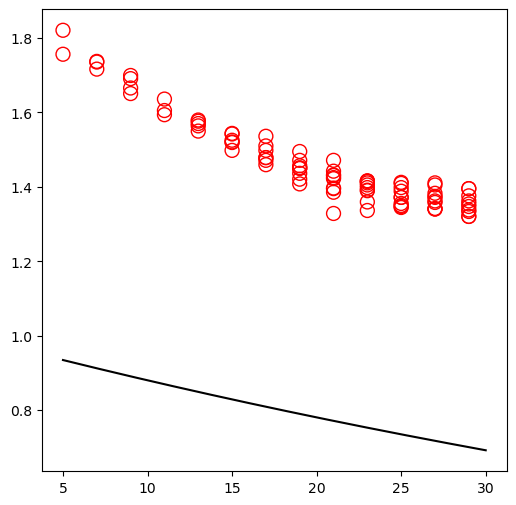

In [318]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x_data = np.array(T_plot)
y_data = np.array(Q10_plot)

def exponential_func(x, a, b, c):
    return a * np.exp(b * (x+c))

param, _ = curve_fit(exponential_func, x_data, y_data)

a = param[0]
b = param[1]
c = param[2]
a = 1
b = -0.012
c = 0.61
fig = plt.figure(figsize=(6, 6),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)

ax = fig.add_subplot(1,1,1)
ax.scatter(T_plot, Q10_plot, marker='o', edgecolor='red', facecolor='none', s=100)


x_range = np.linspace(5, 30, 1000)
y_range = exponential_func(x_range, a, b, c)
ax.plot(x_range, y_range, '-', color='black')

plt.show()

In [292]:
a

1.6347611257713723

In [293]:
b

-0.011320247947890896

In [294]:
c

-9.83431394228882

In [224]:
from scipy.optimize import curve_fit

def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

C:\Users\111\AppData\Local\Temp\ipykernel_6268\1775159919.py:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


In [319]:
T_fit = []
Q10_fit = []
a = 1
b = -0.012
c = 0.61
for i in range(len(T_mean_plot)):
    T_fit.append(T_mean_plot[i])
    x = T_mean_plot[i]
    y = a * np.exp(b*x+c)
    Q10_fit.append(y)

(1.2, 1.9)

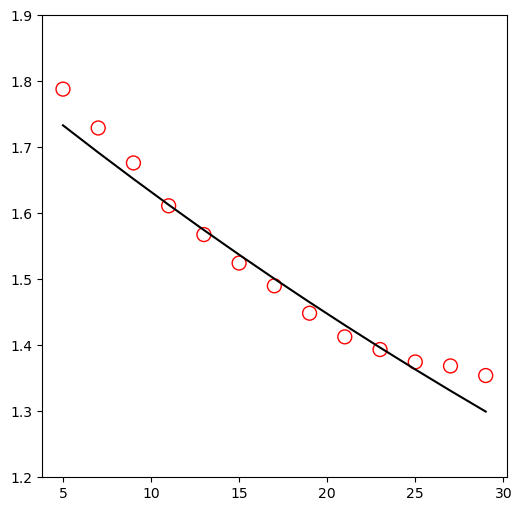

In [322]:
fig = plt.figure(figsize=(6, 6),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)


colors = ["#0000FF", "#4169E1", "#6495ED", "#00FF00", "#7CFC00", "#ADFF2F", "#FF0000", "#FF4500", "#FF6347"]
ax = fig.add_subplot(1,1,1)

ax.scatter(T_mean_plot, Q10_mean_plot, marker='o', edgecolor='red', facecolor='none', s=100)
ax.plot(T_fit, Q10_fit, color='black')

ax.set_ylim(1.2,1.9)

In [175]:
Q10_data = pd.read_csv('./Q10_non_forest_AVP.csv')
m,n = Q10_data.shape

Q10_std_plot = []
T_plot = []

for Ti in np.arange(5,31,2):
    Q10_i = []

    for j in range(m):
        if Q10_data['T'][j] == Ti and  Q10_data['pvalue'][j] <0.01 and Q10_data['SE'][j] <0.1:
            Q10_i.append(Q10_data['Q10'][j])

    if len(Q10_i)>=3:
        Q10_std_plot.append(np.std(Q10_i))
        T_plot.append(Ti)

(0.0, 0.05)

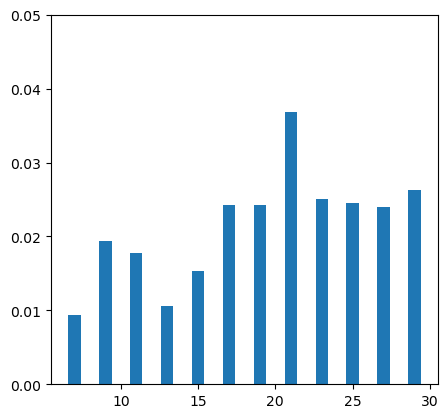

In [177]:
fig = plt.figure(figsize=(5, 4.8),dpi=100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
ax = fig.add_subplot(1,1,1)
ax.bar(T_plot, Q10_std_plot)
ax.set_ylim(0,0.05)
#ax.scatter(AVP_plot[i], Q10_plot[i], marker='o', edgecolor='black', facecolor='none', s=50 )  #


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     4.615
Date:                 周六, 28 10月 2023   Prob (F-statistic):             0.0844
Time:                        21:29:02   Log-Likelihood:              -0.046669
No. Observations:                   7   AIC:                             4.093
Df Residuals:                       5   BIC:                             3.985
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0068      0.362      5.547      0.0

D:\software\anaconda\envs\Plot\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
D:\software\anaconda\envs\Plot\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
D:\software\anaconda\envs\Plot\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
D:\software\anaconda\envs\Plot\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


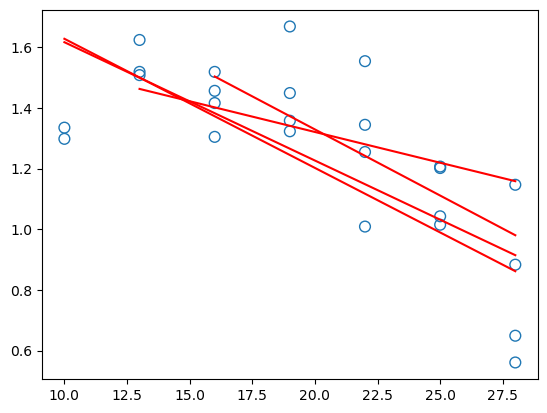

In [28]:
for i in range(4):
    T = T_plot[i]
    Q10 = Q10_plot[i]

    # 添加常数列
    X = sm.add_constant(T)

    # 创建模型并拟合数据
    model = sm.OLS(Q10, X)
    results = model.fit()

    # 打印拟合结果
    print(results.summary())

    # 提取拟合参数
    intercept, slope = results.params

    # 生成拟合线的x和y值
    x_fit = np.linspace(min(T), max(T), 100)
    y_fit = intercept + slope * x_fit

    # 绘制散点图和拟合线
    plt.scatter(T, Q10, marker='o', edgecolors="tab:blue", facecolor='none', s=60)
    plt.plot(x_fit, y_fit, color='red')

In [2]:
path = 'D:/Data/project2/lmx_data/LMX_each_type/'
for pathi in os.listdir(path):
    SWC = ['SWC']
    uWUE = ['uWUE']
    SE = ['SE']
    p = ['pvalue']
    sig = ['significance']
    for csv_file in os.listdir(path+pathi+'/'):
        seleceted_data = pd.read_csv(path+pathi+'/'+csv_file)
        seleceted_data['ET'] = seleceted_data['ET']/1000
        m,n = seleceted_data.shape
        unique_values = np.unique(seleceted_data['num'])
        if len(unique_values) >= 100:
            model = Lmer(formula="GPP_VPD ~ ET + (ET||num)",
                             data=seleceted_data)
            model_result = model.fit()
            SWC.append(int(csv_file[4:-4]))
            uWUE.append(model_result['Estimate'][1])
            SE.append(model_result['SE'][1])
            p.append(model_result['P-val'][1])
            sig.append(model_result['Sig'][1])
            result = np.array([SWC, uWUE, SE, p, sig])
            result_pd = pd.DataFrame(result.T)
            save_path = './uWUE_result/each_type_100p/'+pathi+'_uWUE.csv'
            result_pd.to_csv(save_path, index= 'a', header= False)

Linear mixed model fit by REML [’lmerMod’]
Formula: GPP_VPD~ET+(ET||num)

Family: gaussian	 Inference: parametric

Number of observations: 20264	 Groups: {'num': 100.0}

Log-likelihood: 14329.934 	 AIC: -28649.868

Random effects:

                 Name    Var    Std
num       (Intercept)  0.016  0.127
num.1              ET  9.791  3.129
Residual               0.014  0.116

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: GPP_VPD~ET+(ET||num)

Family: gaussian	 Inference: parametric

Number of observations: 61558	 Groups: {'num': 280.0}

Log-likelihood: 35213.517 	 AIC: -70417.035

Random effects:

                 Name    Var    Std
num       (Intercept)  0.028  0.167
num.1              ET  4.610  2.147
Residual               0.018  0.133

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: GPP_VPD~ET+(ET||num)

Family: gaussian	 Inference: parametric

Number of observa

In [19]:
uWUE_data = pd.read_csv('./uWUE_result/each_type_100p/GRA_uWUE.csv')
m,n = uWUE_data.shape
SWC= []
uWUE = []
uWUE_std = []
for i in range(m-1):
    if uWUE_data['pvalue'][i] < 0.01:
        SWC.append(uWUE_data['SWC'][i])
        uWUE.append(uWUE_data['uWUE'][i])
        uWUE_std.append(uWUE_data['SE'][i])

C:\Users\111\AppData\Local\Temp\ipykernel_5364\1987114459.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


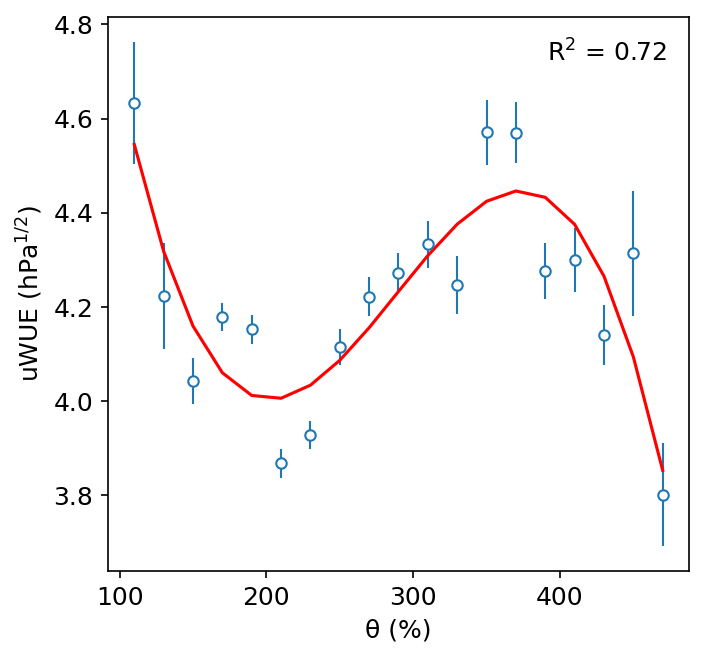

In [20]:
fig = plt.figure(figsize=(5, 4.8),dpi=150)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('Blues')

ax.errorbar( SWC,
             uWUE,
             uWUE_std,
             fmt='o',          #marker='o',c='',edgecolors='g'
             color = 'white',
             mec = 'tab:blue',
             mew = 1,
             ecolor = 'tab:blue',
             elinewidth = 1,
             capsize = 0,
             markersize = 5,
             );
x = SWC
y = uWUE
# 执行二次函数拟合
coefficients = np.polyfit(x, y, 3)
p = np.poly1d(coefficients)

# 计算决定系数（R-squared）
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)

# 绘制原始数据和拟合曲线

ax.plot(x, p(x), color='red', label='R$^{2}$ = '+str(round(r_squared,2)))

#ax.set_ylim(0.009,0.021)

ax.legend(fontsize=12, edgecolor='white', loc='upper right', frameon=True, handlelength = 0)
ax.set_xlabel('\u03B8 (%)', size = 12);
ax.set_ylabel('uWUE (hPa$^{1/2}$)', size = 12)
#ax.set_title('d', loc='left', y = 1,size = 30)
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)

In [25]:
G = 6.67e-11  # 引力常数 (m^3 kg^-1 s^-2)
Ms = 1.989e30  # 太阳的质量 (kg)
m = 1.67e-27+9.11e-31 # 质子的质量 (kg)
k = 1.38e-23  # 玻尔兹曼常数 (J K^-1)
T = 1e6  # 温度 (K)

Rc = G * Ms * m / (4 * k * T)
Vc = (2*k*T/m)**0.5
print("Rc的值为:", Rc)
print("Vc的值为:", Vc)

Rc的值为: 4015825724.625001
Vc的值为: 128522.12037484073


In [28]:
import math
from scipy.optimize import fsolve

def equation(v, r):
    vc = 128522  # 质子的热速度
    G = 6.67430e-11  # 引力常数
    Ms = 1.989e30  # 太阳的质量
    Rc = 4018414637  # 阻尼半径

    return v**2 - vc**2 * (1 + math.log(v**2/vc**2)) - 4*vc**2*math.log(r/Rc) - 2*G*Ms*(1/r - 1/Rc)

# 水星（Mercury）
r_mercury = 57.9e9
v_mercury = fsolve(equation, x0=1e5, args=(r_mercury,))

# 地球（Earth）
r_earth = 149.6e9
v_earth = fsolve(equation, x0=1e5, args=(r_earth,))

# 火星（Mars）
r_mars = 227.9e9
v_mars = fsolve(equation, x0=1e5, args=(r_mars,))

# 木星（Jupiter）
r_jupiter = 778.5e9
v_jupiter = fsolve(equation, x0=1e5, args=(r_jupiter,))

# 海王星（Neptune）
r_neptune = 4495.1e9
v_neptune = fsolve(equation, x0=1e5, args=(r_neptune,))

print("水星（Mercury）的太阳风风速：", v_mercury[0], "米/秒")
print("地球（Earth）的太阳风风速：", v_earth[0], "米/秒")
print("火星（Mars）的太阳风风速：", v_mars[0], "米/秒")
print("木星（Jupiter）的太阳风风速：", v_jupiter[0], "米/秒")
print("海王星（Neptune）的太阳风风速：", v_neptune[0], "米/秒")

水星（Mercury）的太阳风风速： 2415.2793837340323 米/秒
地球（Earth）的太阳风风速： -484839.4788530298 米/秒
火星（Mars）的太阳风风速： -172.87283760245197 米/秒
木星（Jupiter）的太阳风风速： 15.189016357143402 米/秒
海王星（Neptune）的太阳风风速： -0.4594890049111805 米/秒


In [29]:
(2*1.38*10**10/1.67)**0.5

128557.17058096926

In [30]:
import math

k = 1.38e-23  # 玻尔兹曼常数（J/K）
T = 10**6  # 温度（K）
m = 1.67e-27  # 质量（千克）

Vc = math.sqrt(2 * k * T / m)

print("Vc 等于：", Vc, "米/秒")

Vc 等于： 128557.17058096926 米/秒


In [32]:
import math

def equation(v, r):
    vc = 128557  # 质子的热速度
    G = 6.67430e-11  # 引力常数
    Ms = 1.989e30  # 太阳的质量
    Rc = 4018414637  # 阻尼半径

    return v**2 - vc**2 * (1 + math.log(v**2/vc**2)) - 4*vc**2*math.log(r/Rc) - 2*G*Ms*(1/r - 1/Rc)

def iteration_method(func, x0, tol=1e-6, max_iter=100):
    x = x0

    for i in range(max_iter):
        x_next = func(x)
        if abs(x_next - x) < tol:
            return x_next
        x = x_next

    print("达到最大迭代次数，无法找到满足要求的解")
    return None

def func(v):
    return vc * math.sqrt(1 + math.log(v**2/vc**2))

vc = 128557  # 质子的热速度
G = 6.67430e-11  # 引力常数
Ms = 1.989e30  # 太阳的质量
Rc = 4018414637  # 阻尼半径

# 水星（Mercury）
r_mercury = 57.9e9
v_mercury = iteration_method(lambda v: math.sqrt(func(v)**2 - 4*vc**2*math.log(r_mercury/Rc) - 2*G*Ms*(1/r_mercury - 1/Rc)), x0=1e5)

# 地球（Earth）
r_earth = 149.6e9
v_earth = iteration_method(lambda v: math.sqrt(func(v)**2 - 4*vc**2*math.log(r_earth/Rc) - 2*G*Ms*(1/r_earth - 1/Rc)), x0=1e5)

# 火星（Mars）
r_mars = 227.9e9
v_mars = iteration_method(lambda v: math.sqrt(func(v)**2 - 4*vc**2*math.log(r_mars/Rc) - 2*G*Ms*(1/r_mars - 1/Rc)), x0=1e5)

# 木星（Jupiter）
r_jupiter = 778.5e9
v_jupiter = iteration_method(lambda v: math.sqrt(func(v)**2 - 4*vc**2*math.log(r_jupiter/Rc) - 2*G*Ms*(1/r_jupiter - 1/Rc)), x0=1e5)

# 海王星（Neptune）
r_neptune = 4495.1e9
v_neptune = iteration_method(lambda v: math.sqrt(func(v)**2 - 4*vc**2*math.log(r_neptune/Rc) - 2*G*Ms*(1/r_neptune - 1/Rc)), x0=1e5)

print("水星（Mercury）的太阳风风速：", v_mercury, "米/秒")
print("地球（Earth）的太阳风风速：", v_earth, "米/秒")
print("火星（Mars）的太阳风风速：", v_mars, "米/秒")
print("木星（Jupiter）的太阳风风速：", v_jupiter, "米/秒")
print("海王星（Neptune）的太阳风风速：", v_neptune, "米/秒")

ValueError: math domain error

In [37]:
import math

def equation(v, r):
    vc = 128557  # 质子的热速度
    G = 6.67430e-11  # 引力常数
    Ms = 1.989e30  # 太阳的质量
    Rc = 4018414637  # 阻尼半径

    return v**2 - vc**2 * (1 + math.log(v**2/vc**2)) - 4*vc**2*math.log(r/Rc) - 2*G*Ms*(1/r - 1/Rc)

def derivative(v, r):
    vc = 128557  # 质子的热速度

    return 2*v - 2*vc**2/v + 8*vc**2/r - 2*G*Ms/r**2

def newton_method(func, derivative, x0, tol=1e-6, max_iter=1000000):
    x = x0

    for i in range(max_iter):
        f = func(x)
        f_prime = derivative(x)
        x_next = x - f / f_prime

        if abs(x_next - x) < tol:
            return x_next
        x = x_next

    print("达到最大迭代次数，无法找到满足要求的解")
    return None

# 水星（Mercury）
r_mercury = 57.9*10**9
v_mercury = newton_method(lambda v: equation(v, r_mercury), lambda v: derivative(v, r_mercury), x0=1e5)

# 地球（Earth）
r_earth = 149.6*10**9
v_earth = newton_method(lambda v: equation(v, r_earth), lambda v: derivative(v, r_earth), x0=1e5)

# 火星（Mars）
r_mars = 227.9*10**9
v_mars = newton_method(lambda v: equation(v, r_mars), lambda v: derivative(v, r_mars), x0=1e5)

# 木星（Jupiter）
r_jupiter = 778.5*10**9
v_jupiter = newton_method(lambda v: equation(v, r_jupiter), lambda v: derivative(v, r_jupiter), x0=1e5)

# 海王星（Neptune）
r_neptune = 4495.1*10**9
v_neptune = newton_method(lambda v: equation(v, r_neptune), lambda v: derivative(v, r_neptune), x0=1e5)

print("水星（Mercury）的太阳风风速：", v_mercury, "米/秒")
print("地球（Earth）的太阳风风速：", v_earth, "米/秒")
print("火星（Mars）的太阳风风速：", v_mars, "米/秒")
print("木星（Jupiter）的太阳风风速：", v_jupiter, "米/秒")
print("海王星（Neptune）的太阳风风速：", v_neptune, "米/秒")

水星（Mercury）的太阳风风速： -412210.6427291522 米/秒
地球（Earth）的太阳风风速： -485010.3507570793 米/秒
火星（Mars）的太阳风风速： -514182.1979650028 米/秒
木星（Jupiter）的太阳风风速： -591081.1817828406 米/秒
海王星（Neptune）的太阳风风速： -685495.8590119932 米/秒


In [30]:
v = [412*1000, 485*1000, 514*1000, 591*1000, 685*1000]
r = [57.9*10**9, 149.6*10**9, 227.9*10**9, 778.5*10**9, 4495.1*10**9]
w = 2.866*10**-6
R = 6.96*10**8
angle = [68.1, 48.5, 38.2, 14.8, 3]
for i in range(5):
    Br = R**2/r[i]**2
    anglei = math.radians(angle[i])

    # 计算余弦值
    tan_value = math.tan(anglei)
    print(1/tan_value)

0.40199742250688436
0.8847252645559438
1.2707733256451532
3.784848088365916
19.081136687728208


In [28]:
angle = math.radians(45)

# 计算余弦值
tan_value = math.tan(angle)